In [10]:
import math

def biseccion(f, a, b, tol, max_iter=100):
    """Método de bisección para encontrar raíces de f(x) = 0 en [a,b]"""
    if f(a) * f(b) >= 0:
        raise ValueError(f"No hay cambio de signo en [{a},{b}]. f(a)={f(a):.4f}, f(b)={f(b):.4f}")
    
    iter_count = 0
    while (b - a) / 2 > tol and iter_count < max_iter:
        c = (a + b) / 2
        if abs(f(c)) < 1e-12:  # Consideramos cero si es muy pequeño
            return c, iter_count
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        iter_count += 1
    
    return (a + b) / 2, iter_count

## Ejercicio 1: x^3 - 7x^2 + 14x - 6 = 0
def f1(x):
    return x**3 - 7*x**2 + 14*x - 6

print("--- Ejercicio 1 ---")
# a. Intervalo [0,1]
try:
    sol1a, iter1a = biseccion(f1, 0, 1, 1e-2)
    print(f"1a: Solución ≈ {sol1a:.4f} en {iter1a} iteraciones")
except ValueError as e:
    print(f"1a: Error - {e}")

# b. Intervalo [1, 3.2] (corregido)
try:
    sol1b, iter1b = biseccion(f1, 1, 3.2, 1e-2)
    print(f"1b: Solución ≈ {sol1b:.4f} en {iter1b} iteraciones")
except ValueError as e:
    print(f"1b: Error - {e}")

# c. Intervalo [3.2,4]
try:
    sol1c, iter1c = biseccion(f1, 3.2, 4, 1e-2)
    print(f"1c: Solución ≈ {sol1c:.4f} en {iter1c} iteraciones")
except ValueError as e:
    print(f"1c: Error - {e}")

## Ejercicio 2b: x = 2*sin(x), primer valor positivo
def f2(x):
    return x - 2*math.sin(x)

print("\n--- Ejercicio 2b ---")
try:
    sol2, iter2 = biseccion(f2, 1, 2, 1e-5)
    print(f"Primer solución positiva ≈ {sol2:.6f} en {iter2} iteraciones")
except ValueError as e:
    print(f"Error - {e}")

## Ejercicio 3b: x = tan(x), primer valor positivo
def f3(x):
    return x - math.tan(x)

print("\n--- Ejercicio 3b ---")
try:
    sol3, iter3 = biseccion(f3, 4, 4.5, 1e-5)
    print(f"Primer solución positiva ≈ {sol3:.6f} en {iter3} iteraciones")
except ValueError as e:
    print(f"Error - {e}")

## Ejercicio 4b: x^2 - 1 = e^(1-x^2) en [-2,0]
def f4(x):
    return x**2 - 1 - math.exp(1 - x**2)

print("\n--- Ejercicio 4b ---")
try:
    sol4, iter4 = biseccion(f4, -2, 0, 1e-3)
    print(f"Solución en [-2,0] ≈ {sol4:.4f} en {iter4} iteraciones")
except ValueError as e:
    print(f"Error - {e}")

## Ejercicio 5: Convergencia para f(x) = (x+3)(x+1)^2x(x-1)^3(x-3)
def f5(x):
    return (x+3)*(x+1)**2*x*(x-1)**3*(x-3)

print("\n--- Ejercicio 5 ---")
intervalos = [
    ([-1.5, 2.5], "a. [-1.5, 2.5]"),
    ([-0.5, 2.4], "b. [-0.5, 2.4]"),
    ([-0.5, 3], "c. [-0.5, 3]"),
    ([-3, -0.5], "d. [-3, -0.5]")
]

for intervalo, nombre in intervalos:
    a, b = intervalo
    try:
        sol, _ = biseccion(f5, a, b, 1e-6)
        print(f"{nombre}: Converge a {sol:.2f}")
    except ValueError as e:
        print(f"{nombre}: Error - {e}")

## Ejercicio Aplicado 1: Abrevadero semicircular
def f_abrevadero(h):
    r = 1
    L = 10
    V = 12.4
    term = 0.5*math.pi*r**2 - r**2*math.asin(h/r) - h*math.sqrt(r**2 - h**2)
    return L * term - V

print("\n--- Ejercicio Aplicado 1 ---")
try:
    sol_abrev, iter_abrev = biseccion(f_abrevadero, 0.8, 0.9, 0.01)
    print(f"Profundidad del agua ≈ {sol_abrev:.2f} cm en {iter_abrev} iteraciones")
except ValueError as e:
    print(f"Error - {e}")

## Ejercicio Aplicado 2: Caída con resistencia del aire
def f_caida(t):
    s0 = 300
    m = 0.25
    k = 0.1
    g = 9.81
    term1 = (m*g)/k * t
    term2 = (m**2 * g)/(k**2) * (1 - math.exp(-k*t/m))
    return s0 - term1 + term2

print("\n--- Ejercicio Aplicado 2 ---")
try:
    sol_caida, iter_caida = biseccion(f_caida, 15, 16, 0.01)
    print(f"Tiempo de caída ≈ {sol_caida:.2f} s en {iter_caida} iteraciones")
except ValueError as e:
    print(f"Error - {e}")

## Ejercicio Teórico 1: Cálculo de iteraciones necesarias
print("\n--- Ejercicio Teórico 1 ---")
a, b = 1, 2
tol = 1e-4
n = math.ceil((math.log(b - a) - math.log(tol)) / math.log(2))
print(f"Se necesitan al menos {int(n)} iteraciones para tolerancia {tol}")

def f_teorico(x):
    return x**3 - x - 1

try:
    sol_teorico, iter_teorico = biseccion(f_teorico, 1, 2, 1e-4)
    print(f"Aproximación de la raíz: {sol_teorico:.6f} en {iter_teorico} iteraciones")
except ValueError as e:
    print(f"Error - {e}")

## Ejercicio Teórico 2: Función sin(pi*x)
def f_teorico2(x):
    return math.sin(math.pi * x)

print("\n--- Ejercicio Teórico 2 ---")
# Caso a: a + b < 2
try:
    a, b = -0.5, 1.9  # a + b = 1.4 < 2
    sol_a, _ = biseccion(f_teorico2, a, b, 1e-6)
    print(f"Caso a (a+b<2): Converge a {sol_a:.2f}")

    # Caso b: a + b > 2
    a, b = -0.5, 2.6  # a + b = 2.1 > 2
    sol_b, _ = biseccion(f_teorico2, a, b, 1e-6)
    print(f"Caso b (a+b>2): Converge a {sol_b:.2f}")

    # Caso c: a + b = 2
    a, b = -0.5, 2.5  # a + b = 2.0
    sol_c, _ = biseccion(f_teorico2, a, b, 1e-6)
    print(f"Caso c (a+b=2): Converge a {sol_c:.2f}")
except ValueError as e:
    print(f"Error en ejercicio teórico 2: {e}")

--- Ejercicio 1 ---
1a: Solución ≈ 0.5859 en 6 iteraciones
1b: Solución ≈ 3.0023 en 7 iteraciones
1c: Solución ≈ 3.4188 en 6 iteraciones

--- Ejercicio 2b ---
Primer solución positiva ≈ 1.895500 en 16 iteraciones

--- Ejercicio 3b ---
Primer solución positiva ≈ 4.493416 en 15 iteraciones

--- Ejercicio 4b ---
Solución en [-2,0] ≈ -1.2510 en 10 iteraciones

--- Ejercicio 5 ---
a. [-1.5, 2.5]: Error - No hay cambio de signo en [-1.5,2.5]. f(a)=-39.5508, f(b)=-284.2383
b. [-0.5, 2.4]: Error - No hay cambio de signo en [-0.5,2.4]. f(a)=-3.6914, f(b)=-246.6597
c. [-0.5, 3]: Error - No hay cambio de signo en [-0.5,3]. f(a)=-3.6914, f(b)=0.0000
d. [-3, -0.5]: Error - No hay cambio de signo en [-3,-0.5]. f(a)=0.0000, f(b)=-3.6914

--- Ejercicio Aplicado 1 ---
Error - No hay cambio de signo en [0.8,0.9]. f(a)=-10.7650, f(b)=-11.8127

--- Ejercicio Aplicado 2 ---
Error - No hay cambio de signo en [15,16]. f(a)=-6.7145, f(b)=-31.1894

--- Ejercicio Teórico 1 ---
Se necesitan al menos 14 iteracion

# GRÁFICAS 

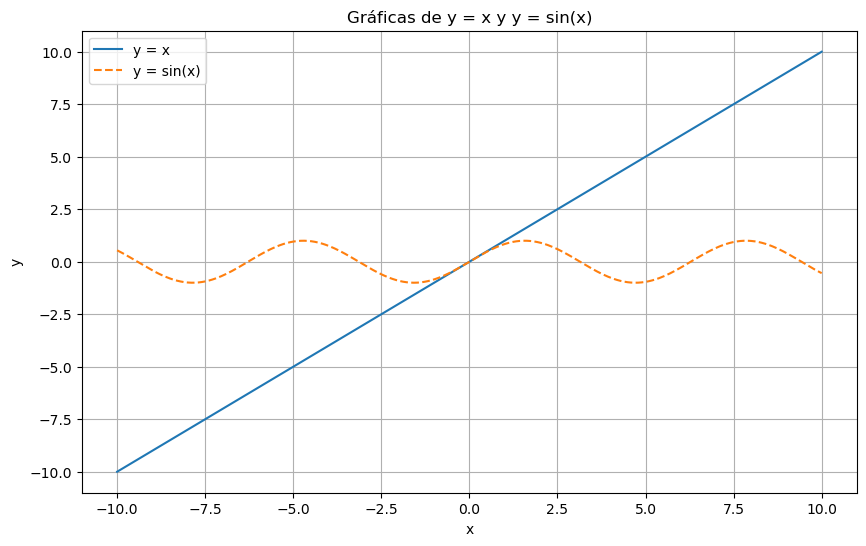

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Crear un rango de valores para x
x = np.linspace(-10, 10, 400)

# Definir las funciones
y1 = x
y2 = np.sin(x)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='y = x')
plt.plot(x, y2, label='y = sin(x)', linestyle='--')

# Añadir etiquetas y título
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráficas de y = x y y = sin(x)')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()


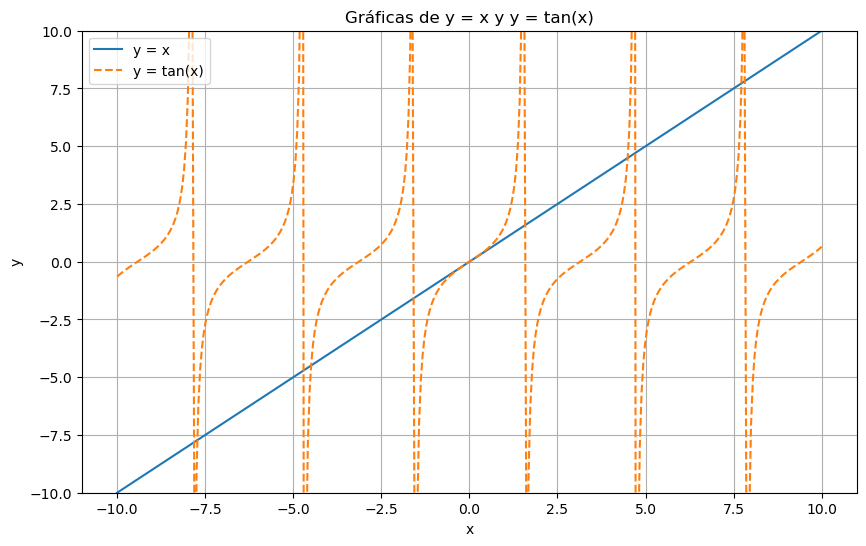

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Crear un rango de valores para x, evitando los puntos donde tan(x) no está definida
x = np.linspace(-10, 10, 400)
x = x[np.abs(np.cos(x)) > 0.01]  # Filtrar valores donde cos(x) es muy cercano a 0

# Definir las funciones
y1 = x
y2 = np.tan(x)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='y = x')
plt.plot(x, y2, label='y = tan(x)', linestyle='--')

# Añadir etiquetas y título
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráficas de y = x y y = tan(x)')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.ylim(-10, 10)  # Limitar el eje y para una mejor visualización
plt.show()


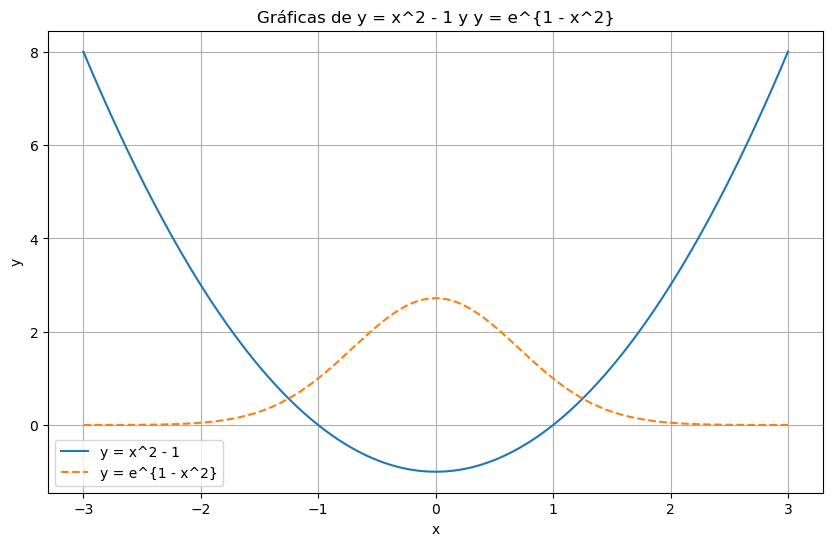

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Crear un rango de valores para x
x = np.linspace(-3, 3, 400)

# Definir las funciones
y1 = x**2 - 1
y2 = np.exp(1 - x**2)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='y = x^2 - 1')
plt.plot(x, y2, label='y = e^{1 - x^2}', linestyle='--')

# Añadir etiquetas y título
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráficas de y = x^2 - 1 y y = e^{1 - x^2}')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()
